In [4]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier

from art.estimators.classification import XGBoostClassifier, LightGBMClassifier, SklearnClassifier
from art.utils import load_dataset
from art.metrics import RobustnessVerificationTreeModelsCliqueMethod

import warnings
warnings.filterwarnings('ignore')

In [5]:
NB_TRAIN = 100
NB_TEST = 100

(x_train, y_train), (x_test, y_test), _, _ = load_dataset('mnist')

n_classes = 10
n_features = 28 * 28
n_train = x_train.shape[0]
n_test = x_test.shape[0]
x_train = x_train.reshape((n_train, n_features))
x_test = x_test.reshape((n_test, n_features))

x_train = x_train[:NB_TRAIN]
y_train = y_train[:NB_TRAIN]
x_test = x_test[:NB_TEST]
y_test = y_test[:NB_TEST]

In [6]:
model = XGBClassifier(n_estimators=4, max_depth=6)
model.fit(x_train, np.argmax(y_train, axis=1))

classifier = XGBoostClassifier(model=model, nb_features=n_features, nb_classes=n_classes)

rt = RobustnessVerificationTreeModelsCliqueMethod(classifier=classifier)
average_bound, verified_error = rt.verify(x=x_test, y=y_test, eps_init=0.3, nb_search_steps=10, max_clique=2,
                                          max_level=2)

print('Average bound:', average_bound)
print('Verified error at eps:', verified_error)

Decision tree verification:   0%|          | 0/100 [00:00<?, ?it/s]

Average bound: 0.03186914062500001
Verified error at eps: 0.99


In [7]:
model = RandomForestClassifier(n_estimators=4, max_depth=6)
model.fit(x_train, np.argmax(y_train, axis=1))

classifier = SklearnClassifier(model=model)

rt = RobustnessVerificationTreeModelsCliqueMethod(classifier=classifier)
average_bound, verified_error = rt.verify(x=x_test, y=y_test, eps_init=0.3, nb_search_steps=10, max_clique=2, 
                                          max_level=2)

print('Average bound:', average_bound)
print('Verified error at eps:', verified_error)

Decision tree verification:   0%|          | 0/100 [00:00<?, ?it/s]

Average bound: 0.016529296875
Verified error at eps: 1.0


In [8]:
model = ExtraTreesClassifier(n_estimators=4, max_depth=6)
model.fit(x_train, np.argmax(y_train, axis=1))

classifier = SklearnClassifier(model=model)

rt = RobustnessVerificationTreeModelsCliqueMethod(classifier=classifier)
average_bound, verified_error = rt.verify(x=x_test, y=y_test, eps_init=0.3, nb_search_steps=10, max_clique=2, 
                                          max_level=2)

print('Average bound:', average_bound)
print('Verified error at eps:', verified_error)

Decision tree verification:   0%|          | 0/100 [00:00<?, ?it/s]

Average bound: 0.05041992187499998
Verified error at eps: 0.99


In [3]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from art.estimators.classification import XGBoostClassifier, LightGBMClassifier, SklearnClassifier
from sklearn.datasets import load_digits
from art.metrics import RobustnessVerificationTreeModelsCliqueMethod

import warnings
warnings.filterwarnings('ignore')

from art.attacks.evasion import DecisionTreeAttack
from art.estimators.classification import SklearnClassifier
from art.estimators.classification.scikitlearn import ScikitlearnExtraTreesClassifier

In [4]:
#샘플 데이터 로드
digits = load_digits()

In [5]:
#훈련, 테스트 데이터 나누기
x = digits.data
y = digits.target

In [6]:
# 엑스트라 트리 선언
xtree = ExtraTreesClassifier(random_state=12)

In [7]:
#엑스트라 트리 훈련
xtree.fit(x,y)

ExtraTreesClassifier(random_state=12)

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


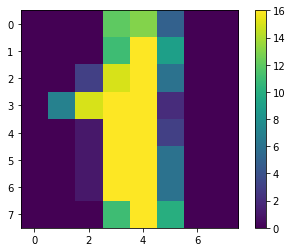

In [8]:
#공격 받기 전 엑스트라 트리 예측 결과 출력
print(xtree.predict(x[:30]))
plt.imshow(x[1].reshape(8,8))
plt.colorbar()

In [9]:
#모든 공격을 적용하기 위한 분류기
art = SklearnClassifier(xtree)

In [10]:
#공격 선언
attack = DecisionTreeAttack(art)
adv = attack.generate(x[:])

EstimatorError: DecisionTreeAttack requires an estimator derived from <class 'art.estimators.classification.scikitlearn.ScikitlearnDecisionTreeClassifier'>, the provided classifier is an instance of <class 'art.estimators.classification.scikitlearn.ScikitlearnExtraTreesClassifier'> and is derived from (<class 'art.estimators.classification.scikitlearn.ScikitlearnClassifier'>, <class 'art.estimators.estimator.DecisionTreeMixin'>).